In [130]:
import sklearn
from sklearn.datasets import make_circles

In [131]:
# Make 1000 samples
n_samples = 1000

#Create circles
# X typically a matrix features
X, y = make_circles(n_samples, 
                   noise = 0.03,
                   random_state = 42)

len(X),  len(y)

(1000, 1000)

In [132]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float)

In [133]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

#This is the order of the test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size= 0.2,
                                                   random_state=42)
len(X_train)

800

In [134]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [123]:
# Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling our data
        self.layer_1 = nn.Linear(in_features = 2, out_features=5) #The out features of this layer has to match the next layer
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1) #Out puts a single features, same shape as y
    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer_2 -> output
    

In [124]:
X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [125]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], 
                        "X2": X[:,1],
                       "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1.0
1,-0.756159,0.153259,1.0
2,-0.815392,0.173282,1.0
3,-0.393731,0.692883,1.0
4,0.442208,-0.896723,0.0
5,-0.479646,0.676435,1.0
6,-0.013648,0.803349,1.0
7,0.771513,0.147760,1.0
8,-0.169322,-0.793456,1.0
9,-0.121486,1.021509,0.0


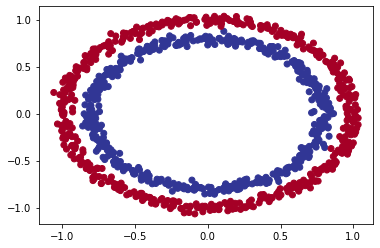

In [80]:
#Visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y= X[:,1],
            c = y,
           cmap = plt.cm.RdYlBu)

# 1 Check input and output shapes

In [31]:
X.shape, y.shape

((1000, 2), (1000,))

In [32]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y {y_sample.shape}")
    

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y ()


##  1.2 Turn our data into tensors and create train and test splits

In [1]:
import torch

In [2]:
# turn data into tensors
import torch
torch.__version__

'1.13.1'

In [26]:
type(X), X.dtype

NameError: name 'X' is not defined

In [33]:
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float)

In [34]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [81]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

#This is the order of the test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size= 0.2,
                                                   random_state=42)
len(X_train)

800

In [83]:
torch.cuda.is_available()

True

In [36]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

We'll break it down into a few parts.

1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Constructing a model by subclassing nn.Module.
3. Defining a loss function and optimizer.
4. Creating a training loop (this'll be in the next section).

In [15]:
from sklearn import datasets

In [104]:
# Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling our data
        self.layer_1 = nn.Linear(in_features = 2, out_features=5) #The out features of this layer has to match the next layer
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1) #Out puts a single features, same shape as y
    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer 1 -> layer_2 -> output
    

In [105]:
#Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)    
model_0    
    

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features = 5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.5152,  0.6237],
                      [-0.6757,  0.2194],
                      [ 0.1934,  0.2352],
                      [-0.6107, -0.0606],
                      [-0.4736, -0.2816]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.4605, -0.6483,  0.2784,  0.1392,  0.0016], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0435,  0.1032,  0.1285, -0.4211,  0.2570]], device='cuda:0')),
             ('layer_2.bias', tensor([0.1570], device='cuda:0'))])

In [44]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

In [45]:
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\n First 10 predictions: \n {untrained_preds[:10]}")
print(f"\n First 10 labels: \n {y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

 First 10 predictions: 
 tensor([[-0.0959],
        [-0.1344],
        [-0.0557],
        [-0.1071],
        [-0.1519],
        [-0.1746],
        [-0.2067],
        [-0.2163],
        [-0.0518],
        [-0.1380]], device='cuda:0')

 First 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Setting up Loss and Optimizer

In [63]:
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation fucntion prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr=0.1)

In [68]:
# Calculate accuracy - true positive / (true positive + true negative) * 100
# out of a100 examples, what percentage does our model get right

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # Counts how many are correct
    
    acc = (correct/len(y_pred)) * 100
    return acc


## 3. Train model

to trian our model, we'ere going to need to build a training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropogation)
5. Optimzer(gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
our model outputs are going to be raw **logits**

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our mode's prediction probabilities to **prediction labels** by either rounding them or taking the argmax().

In [49]:
# View the first 5 outputs for the forward pass on the test data

model_0.eval()
with torch.inference_mode(): #Whenever we are makign predictions run this
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0959],
        [-0.1344],
        [-0.0557],
        [-0.1071],
        [-0.1519]], device='cuda:0')

In [50]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

For our prediction probability values, we need to perform a range-style rounding on them:

* y_pred_probs >= 0.5, y=1 (class 1)
* y_pred_probs < 0.5, y=0 (class 0)

In [51]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs =  torch.sigmoid(y_logits)
y_pred_probs

# sigmoid probabilities for what our model thinks the probability it is for these results to be a certain class

tensor([[0.4760],
        [0.4665],
        [0.4861],
        [0.4733],
        [0.4621]], device='cuda:0')

In [56]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In Full (logits -> pred probs -> pred labels   )
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality, to check if they are equal to each other
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))



tensor([True, True, True, True, True], device='cuda:0')


In [57]:
y_preds, y_pred_labels

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]], device='cuda:0'),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]], device='cuda:0', grad_fn=<RoundBackward0>))

## 3.2 Building a Training loop

In [ ]:
# Creating a loss function
# loss_fn = nn.

In [103]:
# model_0(X_train)
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]], device='cuda:0')

In [109]:
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### training
    
    # 1. forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels
    
    # 2. Calculate loss/accuracy
    # Takes in the results from the x_train (logits and compares it to the results of the y_train)
    # I'm assuming it is to minimize the loss in that comparison
    loss = loss_fn(y_logits, #BCEwithlogitsloss that just uses the logits, it has the sigmoid fuction built in
                  y_train)
    
    acc = accuracy_fn(y_true = y_train,
                     y_pred = y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Loss backward (backpropogation)
    loss.backward()
    
    # 5. Optimizer step( gradient descent)
    optimizer.step() 
    
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc = accuracy_fn(y_true = y_test,
                              y_pred = test_pred)
        
    if epoch % 10 == 0:
        # loss:.5f - the number of decimal points
        print(f"Epoch: {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_addmm)

## 4. Make predictions and evaluate the model

From the metrix it looks like our model isn't learning...
So to inspect it let's make some predictions and make them visual!

TO do so, we're going to import a function called 'plot_decision_boundary()'

In [74]:
import requests
from pathlib import Path

# Download helper fnctions form Learn PyTorch rep (if it's not downloaded)

if Path("helper_functions.py").is_file():
    print("helper_function.py already exists, skipping download")
else:
    print("Download helped_helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

            
from helper_functions import plot_predictions, plot_decision_boundary

Download helped_helper_functions.py


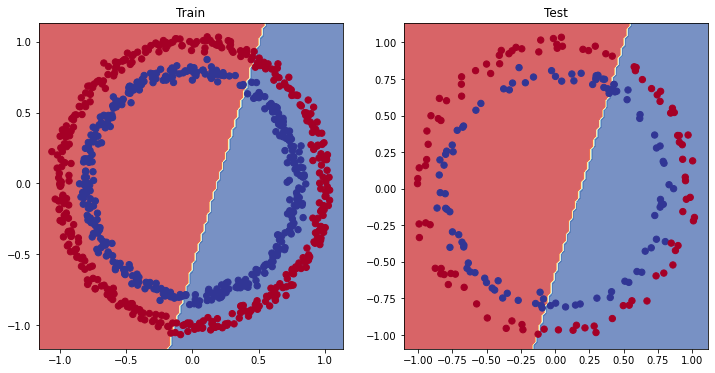

In [108]:
# Plot decision boundary of the model

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)



# 5. Improving a model (from a model perspective)

* Add more layers
* Add more hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function


These options are all from a mode's persepective, but we can work with the data as well. 

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**


Let's try to improve our model by:

* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [110]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6210, -0.4982],
                      [-0.4901,  0.5256],
                      [ 0.6174,  0.1405],
                      [-0.6584, -0.3736],
                      [-0.5072, -0.1864]])),
             ('layer_1.bias',
              tensor([ 0.4692,  0.2648, -0.5399, -0.3082,  0.4470])),
             ('layer_2.weight',
              tensor([[ 0.2511, -0.0557,  0.2045, -0.1229,  0.1256]])),
             ('layer_2.bias', tensor([-0.1481]))])

In [144]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features =10, out_features = 1)
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x))) #This way of writing operations leverages speed ups where possible behind the scenes
#         z = self.layer_1(x)
#         z = self.layer_2(z)
#         z = self.layer_3(z)
#         return 4            

model_1 = CircleModelV1().to(device)
model_1

In [138]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr = 0.1)
# Write a training and evaluation loop

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Train for longer
epochs = 1000

In [148]:
# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train()
    
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> predictions labels
    
    # 2. Calculate the loss/acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train,
                     y_pred = y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backwards (backpropogation)
    loss.backward()
    
    # 5. Optimizer step (gradient descent)
    # adjustments to all of our models parameters to hopefully create a better representation of the data
    
    ### Testing
    model_1.eval()
    with torch.inference_mode(): # to make predictions
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred  = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate loss
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc = accuracy_fn(y_true = y_test,
                              y_pred = test_pred)
        
    # Print out What's happening
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    

    

Epoch: 0 | Loss: 0.70526, Acc: 50.00% | Test loss: 0.70688, Test acc: 50.00%
Epoch: 100 | Loss: 0.70526, Acc: 50.00% | Test loss: 0.70688, Test acc: 50.00%
Epoch: 200 | Loss: 0.70526, Acc: 50.00% | Test loss: 0.70688, Test acc: 50.00%
Epoch: 300 | Loss: 0.70526, Acc: 50.00% | Test loss: 0.70688, Test acc: 50.00%
Epoch: 400 | Loss: 0.70526, Acc: 50.00% | Test loss: 0.70688, Test acc: 50.00%
Epoch: 500 | Loss: 0.70526, Acc: 50.00% | Test loss: 0.70688, Test acc: 50.00%
Epoch: 600 | Loss: 0.70526, Acc: 50.00% | Test loss: 0.70688, Test acc: 50.00%
Epoch: 700 | Loss: 0.70526, Acc: 50.00% | Test loss: 0.70688, Test acc: 50.00%
Epoch: 800 | Loss: 0.70526, Acc: 50.00% | Test loss: 0.70688, Test acc: 50.00%
Epoch: 900 | Loss: 0.70526, Acc: 50.00% | Test loss: 0.70688, Test acc: 50.00%
